# Minimal Visualization of Regression Results

##  Introduction

I was working my way through *An Introduction to Statistical Learning* (https://www.statlearning.com/), and (as usual) the examples in the book were in ```R``` (to be expected from professional statisticians).  My response should be "I'll learn R to replicate these!", but it is usually "How would I do this in Python?".

This post is how I replicated some graphics associated with linear regression in Python.  The situation is that we have data on sales of some product in various areas, with details of money spent in advertising in three channels (TV, newspapers, and radio).  We try to model the effectiveness of the three channels, based upon the sales data, and then visualize the models.

-----------------

## Implementation

In [1]:
%matplotlib inline

In [2]:
%load_ext watermark

In [3]:
%load_ext lab_black

In [4]:
# all imports should go here

import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.graphics.api as smg

# housekeeping imports
import sys
import os
import subprocess
import datetime
import platform
import datetime

# graphic imports
import seaborn as sns

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# path management
from pathlib import Path

------------------
## Data Load

We load the data in a ```Pandas``` DataFrame, and display the first few rows.

In [5]:
data_dir_path = Path('d:/IntroToStatLearning/')

data_path = data_dir_path / 'Advertising.csv'

ads = pd.read_csv(data_path)

ads.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


------------------
## Analysis

In the analysis phase. we first try to fit a linear relationship between the individual spend in advertsing channels, and the sales.  We start with the TV spend.

### TV Alone

We peform a Ordinary Least Squares fit of a linear relationship between TV spend, and sales, and print s asummary of the results.

In [6]:
res1 = ols('sales ~ TV ', data=ads).fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 15 Feb 2021   Prob (F-statistic):           1.47e-42
Time:                        11:41:55   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We note that there is (almost certainly) a relationship between TV spend and sales, but with R^2 = 0.612, there is a lot of variation in the sales data left unexplained by this simple  model.

### Visualization

Now we visualize the regression model we have just created.

We start by ploting the sales data against TV spend  (in practise, we would probably do this as part of initial data exploration).  We use ```matplotlib``` quick and minimal plot facilities, but will add more detail later.

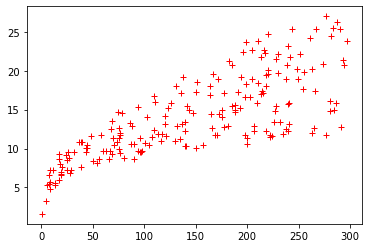

In [7]:
plt.plot(
    ads['TV'], ads['sales'], 'r+',
)

We can see that the variation of the sales data is not uniform, but there is a definite upwards trend. 

Now we plot the OLS line overv the range of the TV spend data.  We use the Regression Results ```params``` member to get the coefficients of the model. 

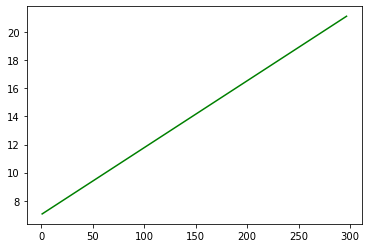

In [8]:
x_range = np.asarray([min(ads['TV']), max(ads['TV'])])
plt.plot(
    x_range,
    res1.params['Intercept'] + res1.params['TV'] * x_range,
    'g-',
)

Now we put these two plots together. For each data point, we draw a small red dot (```'ro', ms=2```), and then draw a thin (```lw=1```) faint (```alpha=0.2```) black line to the regression line.  Then we draw the regression line in green, and label the X and Y axis.

Text(0, 0.5, 'Sales')

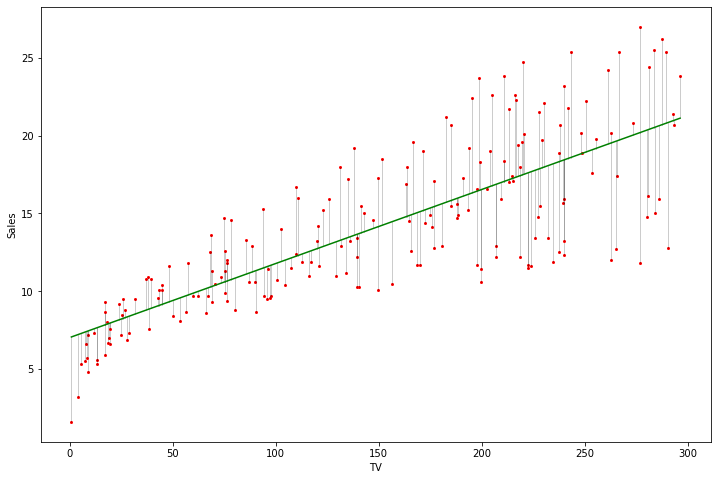

In [9]:
fig, ax = plt.subplots(figsize=(12, 8),)
for x, y_seen, y_fit in zip(
    ads['TV'], ads['sales'], res1.fittedvalues
):
    ax.plot(x, y_seen, 'ro', ms=2)
    ax.plot([x, x], [y_seen, y_fit], 'k-', lw=1, alpha=0.2)

# end for
x_range = np.asarray([min(ads['TV']), max(ads['TV'])])
ax.plot(
    x_range,
    res1.params['Intercept'] + res1.params['TV'] * x_range,
    'g-',
)
ax.set_xlabel('TV')
ax.set_ylabel('Sales')

There are clearly issues with the model as depicted above.  The errors (actual-predicted) are not uniform, and for small values of TV spend, the error is consistently negative.

For interest, we show the mean and observation 95% Confidence Intervals (CIs) below.  We get a linear spread of values of TV spend, and use the ```get_prediction``` method to get a DataFrame with CI values for these input values

We then add these Confidence Intervals to the graphic we had before.

In [10]:
x_ci = np.linspace(0, 300, 20)
gp = res1.get_prediction({'TV': x_ci},)
pred_df = gp.summary_frame()

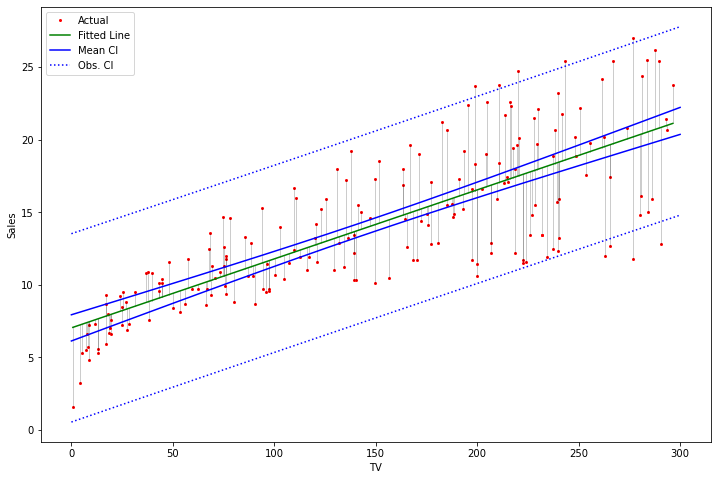

In [11]:
fig, ax = plt.subplots(figsize=(12, 8),)
for x, y_seen, y_fit in zip(
    ads['TV'], ads['sales'], res1.fittedvalues
):
    ax.plot(x, y_seen, 'ro', ms=2)
    ax.plot([x, x], [y_seen, y_fit], 'k-', lw=1, alpha=0.2)

# end for
ax.plot(
    x, y_seen, 'ro', ms=2, label='Actual',
)


x_range = np.asarray([min(ads['TV']), max(ads['TV'])])
ax.plot(
    x_range,
    res1.params['Intercept'] + res1.params['TV'] * x_range,
    'g-',
    label='Fitted Line',
)
ax.set_xlabel('TV')
ax.set_ylabel('Sales')

gp = res1.get_prediction({'TV': x_ci})
pred_df = gp.summary_frame()
ax.plot(x_ci, pred_df['mean_ci_upper'], 'b-')
ax.plot(
    x_ci, pred_df['mean_ci_lower'], 'b-', label='Mean CI',
)
ax.plot(x_ci, pred_df['obs_ci_upper'], 'b:')
ax.plot(
    x_ci, pred_df['obs_ci_lower'], 'b:', label='Obs. CI',
)
ax.legend()

The ```summary_frame``` of the predictions looks like:

In [12]:
pred_df.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,7.032594,0.457843,6.129719,7.935468,0.543349,13.521838
1,7.783172,0.421674,6.951623,8.614722,1.303466,14.262878
2,8.533751,0.386792,7.770990,9.296512,2.062513,15.004988
3,9.284329,0.353577,8.587069,9.981589,2.820485,15.748174
4,10.034908,0.322544,9.398844,10.670971,3.577378,16.492437


-----------------
## Further simple models

Next we construct individual linear models for the relationship between sales and spend on radio and newspapers.  In summary, these explain little of the variance in the sales dataset (R^2 values).

In [13]:
res1 = ols('sales ~ radio ', data=ads).fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Mon, 15 Feb 2021   Prob (F-statistic):           4.35e-19
Time:                        11:41:58   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
res1 = ols('sales ~ newspaper ', data=ads).fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Mon, 15 Feb 2021   Prob (F-statistic):            0.00115
Time:                        11:41:58   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

-------------------
### Linear model with all variables

If we fit a linear model with all variables included, we get a much better explanation of the variation in the salses dataset (R^2 = 0.897).  Unexpectedly, we find a weakly negative relationship between newspaper spend and sales!  In fact, the 95% CI for the newspaper coefficient includes zero. 

In [15]:
res4 = ols('sales ~ TV + newspaper + radio', data=ads).fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 15 Feb 2021   Prob (F-statistic):           1.58e-96
Time:                        11:41:58   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
radio          0.1885      0.009     21.893      0.000       0.172       0.206
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can use ```numpy``` to get the correlation between the various variables, and ```pandas``` to turn this into a DataFrame for a more polished presentation.  We find that the newspaper spend is most strongly correlated with the radio spend.

In [16]:
cm = np.corrcoef(
    ads[['TV', 'radio', 'newspaper', 'sales']],
    rowvar=False,
)
cm

array([[1.        , 0.05480866, 0.05664787, 0.78222442],
       [0.05480866, 1.        , 0.35410375, 0.57622257],
       [0.05664787, 0.35410375, 1.        , 0.22829903],
       [0.78222442, 0.57622257, 0.22829903, 1.        ]])

We show the matrix in a more civilized format

In [17]:
cm_df = pd.DataFrame(
    data=cm,
    columns=['TV', 'radio', 'newspaper', 'sales'],
    index=['TV', 'radio', 'newspaper', 'sales'],
)
cm_df

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


--------------
### Final linear model
In our final purely linear model, we drop the newspaper spend (and find no reduction in the explained variation in the sales dataset).

In [18]:
res5 = ols('sales ~ TV + radio', data=ads).fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 15 Feb 2021   Prob (F-statistic):           4.83e-98
Time:                        11:41:59   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The parameters of this model can be accessed via the ```params``` attribute of the regression results.

In [19]:
res5.params

Intercept    2.921100
TV           0.045755
radio        0.187994
dtype: float64

```n_points``` will be the number of points we use in plotting results

In [20]:
n_points = 20

We now plot the actuals vs predicted, using the 3D features of ```matplotlib```

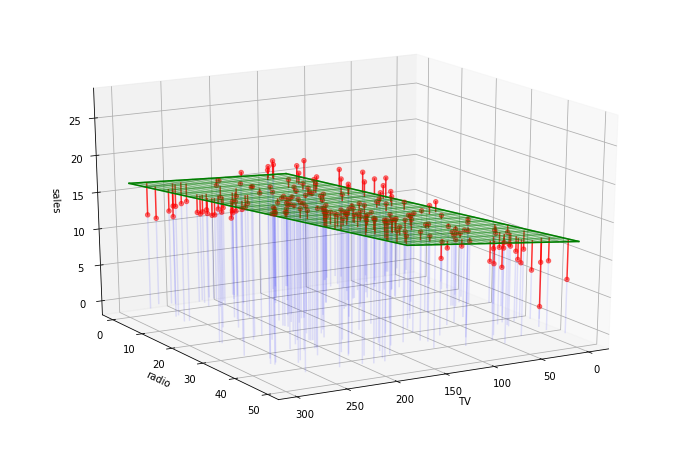

In [21]:
fig = plt.figure(figsize=(12, 8),)
ax = fig.add_subplot(111, projection='3d')

# draw the raw data points
ax.scatter(
    ads['TV'],
    ads['radio'],
    ads['sales'],
    c='red',
    alpha=0.5,
)

# label the X, Y, Z axis
ax.set_xlabel('TV')
ax.set_ylabel('radio')
ax.set_zlabel('sales')

# plot faint vertical lines from the data points to X,Y plane
for x, y, z in zip(ads['TV'], ads['radio'], ads['sales']):
    ax.plot(
        [x, x], [y, y], [0, z], 'b-', alpha=0.1,
    )
# end for

# plot thicker red lines from each data point to predicted value for that data point
for x, y, z1, z2 in zip(
    ads['TV'], ads['radio'], ads['sales'], res5.fittedvalues
):
    ax.plot(
        [x, x], [y, y], [z1, z2], 'r-', alpha=0.8,
    )
# end for

# get the linear span of the X and Y axis values
tv_range = np.linspace(
    min(ads['TV']), max(ads['TV']), n_points
)
radio_range = np.linspace(
    min(ads['radio']), max(ads['radio']), n_points
)


# get datapoints for lines in the vertical planes for X = 0, X= Max(X) and Y=0, Y=Max(Y)
line_tv = (
    tv_range * res5.params['TV'] + res5.params['Intercept']
)
line_radio = (
    radio_range * res5.params['radio']
    + res5.params['Intercept']
)

line2_tv = (
    tv_range * res5.params['TV']
    + res5.params['Intercept']
    + np.ones(n_points)
    * max(radio_range)
    * res5.params['radio']
)
line2_radio = (
    radio_range * res5.params['radio']
    + res5.params['Intercept']
    + np.ones(n_points) * max(tv_range) * res5.params['TV']
)

# plot lines in the vertical planes for X = 0, X= Max(X) and Y=0, Y=Max(Y)
ax.plot(tv_range, np.zeros(n_points), line_tv, 'g-')
ax.plot(np.zeros(n_points), radio_range, line_radio, 'g-')

ax.plot(
    tv_range,
    np.ones(n_points) * max(radio_range),
    line2_tv,
    'g-',
)

ax.plot(
    np.ones(20) * max(tv_range),
    radio_range,
    line2_radio,
    'g-',
)

# plot the predicted values as a mesh grid, and as a colored surface
X, Y = np.meshgrid(tv_range, radio_range)
Z = (
    X * res5.params['TV']
    + Y * res5.params['radio']
    + res5.params['Intercept']
)

surf = ax.plot_wireframe(X, Y, Z, color='green', alpha=0.4)
surfs = ax.plot_surface(X, Y, Z, color='green', alpha=0.1)

# set the viewing angle
ax.view_init(elev=20, azim=60)

We can see that the prediction errors are _not_ distributed uniformly across the range of the datasets  (e.g. the prediction errors are uniformly positive at the left and right corners of the prediction plane, as shown above (predicted > actual).

We can also plot the raw data values in the X=0, and Y=0 planes, as below.

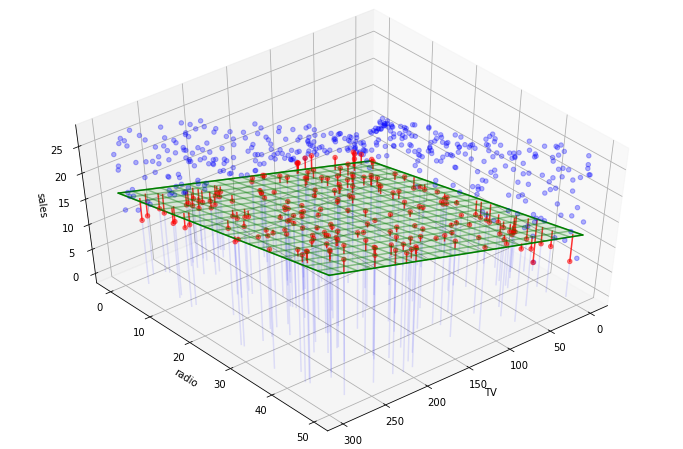

In [22]:
fig = plt.figure(figsize=(12, 8),)
ax = fig.add_subplot(111, projection='3d')

# do 3d scatter plot
ax.scatter(
    ads['TV'],
    ads['radio'],
    ads['sales'],
    c='red',
    alpha=0.5,
)

# set X,Y,Z axis labels
ax.set_xlabel('TV')
ax.set_ylabel('radio')
ax.set_zlabel('sales')

# draw faint line from scatter point to TV/radio plane (sales==0)
for x, y, z in zip(ads['TV'], ads['radio'], ads['sales']):
    ax.plot(
        [x, x], [y, y], [0, z], 'b-', alpha=0.1,
    )
# end for

# show raw datapoints in radio=0 plane
ax.scatter(
    ads['TV'],
    np.zeros(len(ads)),
    ads['sales'],
    c='blue',
    alpha=0.3,
)

# show raw datapoints in TV=0 plane
ax.scatter(
    np.zeros(len(ads)),
    ads['radio'],
    ads['sales'],
    c='blue',
    alpha=0.3,
)


# draw red line from scatter point to fitted point
for x, y, z1, z2 in zip(
    ads['TV'], ads['radio'], ads['sales'], res5.fittedvalues
):
    ax.plot(
        [x, x], [y, y], [z1, z2], 'r-', alpha=0.8,
    )
# end for


# get range of X, Y (or TV, radio) values for plotting
tv_range = np.linspace(
    min(ads['TV']), max(ads['TV']), n_points
)
radio_range = np.linspace(
    min(ads['radio']), max(ads['radio']), n_points
)

# get fitted line values on radio==0 plane, and tv==0 plane
line_tv = (
    tv_range * res5.params['TV'] + res5.params['Intercept']
)
line_radio = (
    radio_range * res5.params['radio']
    + res5.params['Intercept']
)

# get fitted line values on radio=max(radio) plane
line2_tv = (
    tv_range * res5.params['TV']
    + res5.params['Intercept']
    + np.ones(n_points)
    * max(radio_range)
    * res5.params['radio']
)

# get fitted line values on tv=max(tv) plane
line2_radio = (
    radio_range * res5.params['radio']
    + res5.params['Intercept']
    + np.ones(n_points) * max(tv_range) * res5.params['TV']
)


# draw fitted lines in the tv==0 , and the radio==0  planes
ax.plot(tv_range, np.zeros(n_points), line_tv, 'g-')
ax.plot(np.zeros(n_points), radio_range, line_radio, 'g-')


# draw fitted lines in the tv== max(tv), and the radio==max(radio) planes
ax.plot(
    tv_range,
    np.ones(n_points) * max(radio_range),
    line2_tv,
    'g-',
)

ax.plot(
    np.ones(20) * max(tv_range),
    radio_range,
    line2_radio,
    'g-',
)

X, Y = np.meshgrid(tv_range, radio_range)
Z = (
    X * res5.params['TV']
    + Y * res5.params['radio']
    + res5.params['Intercept']
)

# draw wireframe and surface
surf = ax.plot_wireframe(X, Y, Z, color='green', alpha=0.4)
surfs = ax.plot_surface(X, Y, Z, color='green', alpha=0.1)

ax.view_init(elev=50, azim=50)

--------------------------
## Interaction Effects

In our final model, we consider an interaction effect.  The idea is that maybe spending on TV increases the effectiveness of radio, and vice versa.  We find an interaction effect that is statistically greater than zero. R^2 has gone from 0.897 to 0.968, so almost all of the variation in the ads dataset is explained by this model.

In [23]:
res5 = ols('sales ~ TV * radio', data=ads).fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Mon, 15 Feb 2021   Prob (F-statistic):          6.68e-146
Time:                        11:42:02   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Final model visualized
When we visualize the model, we can see that the distribution of the residuals (actual-predicted) is now much more uniform.

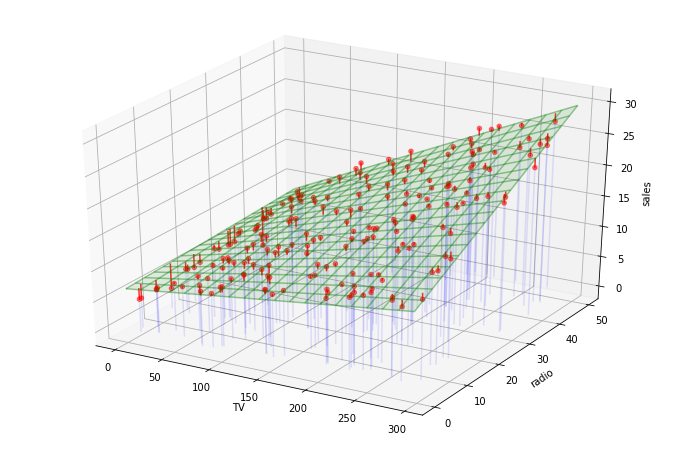

In [24]:
fig = plt.figure(figsize=(12, 8),)
ax = fig.add_subplot(111, projection='3d')

# do 3d scatter plot
ax.scatter(
    ads['TV'],
    ads['radio'],
    ads['sales'],
    c='red',
    alpha=0.5,
)

# set X,Y,Z axis labels
ax.set_xlabel('TV')
ax.set_ylabel('radio')
ax.set_zlabel('sales')

# draw faint line from scatter point to TV/radio plane (sales==0)
for x, y, z in zip(ads['TV'], ads['radio'], ads['sales']):
    ax.plot(
        [x, x], [y, y], [0, z], 'b-', alpha=0.1,
    )
# end for

# draw line from scatter point to fitted point
for x, y, z1, z2 in zip(
    ads['TV'], ads['radio'], ads['sales'], res5.fittedvalues
):
    ax.plot(
        [x, x], [y, y], [z1, z2], 'r-', alpha=0.8,
    )
# end for

X, Y = np.meshgrid(tv_range, radio_range)
Z = (
    X * res5.params['TV']
    + Y * res5.params['radio']
    + X * Y * res5.params['TV:radio']
    + res5.params['Intercept']
)

# draw wireframe and surface
surf = ax.plot_wireframe(X, Y, Z, color='green', alpha=0.4)
surfs = ax.plot_surface(X, Y, Z, color='green', alpha=0.1)

----------------
## Summary

The comparion with the graphics in ITSL is interesting (I assume the graphics in ITSL are done with ```R```). By default, ```matplotlib``` 3D places ticks and tick labels, and shows the 3D aspect by a grid in each of the figure 'back planes'.  The ITSL graphics are very much paired back, with no ticks or tick labels, and no grids.  I can achieve the same result, as below.

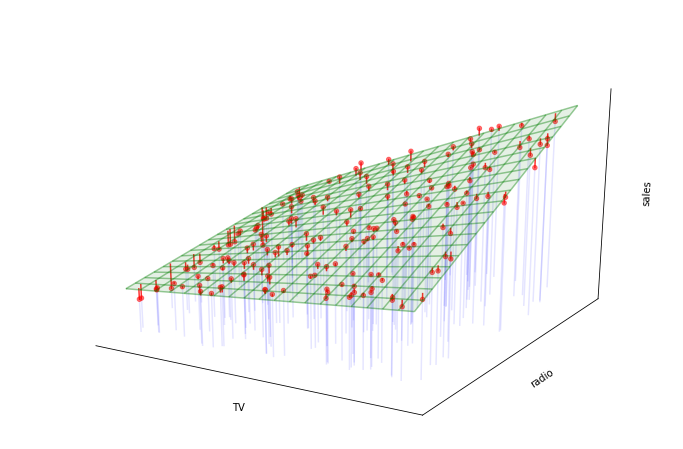

In [25]:
fig = plt.figure(figsize=(12, 8),)
ax = fig.add_subplot(111, projection='3d')

# clear ticks and labels
ax.set_zticks([])
ax.set_yticks([])
ax.set_xticks([])


# clear background panes
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# turn off wireframe at back of 3D plot
ax.zaxis.pane.set_edgecolor('white')
ax.yaxis.pane.set_edgecolor('white')
ax.xaxis.pane.set_edgecolor('white')

# do 3d scatter plot
ax.scatter(
    ads['TV'],
    ads['radio'],
    ads['sales'],
    c='red',
    alpha=0.5,
)

# set X,Y,Z axis labels
ax.set_xlabel('TV')
ax.set_ylabel('radio')
ax.set_zlabel('sales')

# draw faint line from scatter point to TV/radio plane (sales==0)
for x, y, z in zip(ads['TV'], ads['radio'], ads['sales']):
    ax.plot(
        [x, x], [y, y], [0, z], 'b-', alpha=0.1,
    )
# end for

# draw line from scatter point to fitted point
for x, y, z1, z2 in zip(
    ads['TV'], ads['radio'], ads['sales'], res5.fittedvalues
):
    ax.plot(
        [x, x], [y, y], [z1, z2], 'r-', alpha=0.8,
    )
# end for

X, Y = np.meshgrid(tv_range, radio_range)
Z = (
    X * res5.params['TV']
    + Y * res5.params['radio']
    + X * Y * res5.params['TV:radio']
    + res5.params['Intercept']
)

# draw wireframe and surface
surf = ax.plot_wireframe(X, Y, Z, color='green', alpha=0.4)
surfs = ax.plot_surface(X, Y, Z, color='green', alpha=0.1)

-------------------
## Conclusion
Very similar minimalist graphics can be achieved in Python, to match those shown in the ITSL book.

---------------
## Reproducibility

### Notebook version status

In [26]:
theNotebook = 'ISLR-LinReg'

In [27]:
# show info to support reproducibility


def python_env_name():
    envs = subprocess.check_output(
        'conda env list'
    ).splitlines()
    # get unicode version of binary subprocess output
    envu = [x.decode('ascii') for x in envs]
    active_env = list(
        filter(lambda s: '*' in str(s), envu)
    )[0]
    env_name = str(active_env).split()[0]
    return env_name


# end python_env_name

print('python version : ' + sys.version)
print('python environment :', python_env_name())
print('pandas version : ' + pd.__version__)

print('current wkg dir: ' + os.getcwd())
print('Notebook name: ' + theNotebook)
print(
    'Notebook run at: '
    + str(datetime.datetime.now())
    + ' local time'
)
print(
    'Notebook run at: '
    + str(datetime.datetime.utcnow())
    + ' UTC'
)
print('Notebook run on: ' + platform.platform())

python version : 3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]
python environment : renviron
pandas version : 1.0.5
current wkg dir: C:\Users\donrc\Documents\JupyterNotebooks\IntroToStatsLearningNotebookProject\develop
Notebook name: ISLR-LinReg
Notebook run at: 2021-02-15 11:42:39.012874 local time
Notebook run at: 2021-02-15 01:42:39.012874 UTC
Notebook run on: Windows-10-10.0.18362-SP0


In [28]:
%watermark

2021-02-15T11:42:39+10:00

CPython 3.8.3
IPython 7.16.1

compiler   : MSC v.1916 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 94 Stepping 3, GenuineIntel
CPU cores  : 8
interpreter: 64bit


In [29]:
%watermark -h -iv

numpy           1.18.5
platform        1.0.8
statsmodels.api 0.11.1
pandas          1.0.5
seaborn         0.11.0
host name: DESKTOP-SODFUN6


In [30]:
import matplotlib

matplotlib.__version__

'3.2.2'